# RECURRENT NEURAL NETWORK
### RNN USED FOR TIME SERIES ANALYSIS

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\winuser\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# CONTANTS

num_inputs = 2
num_neuron=3


In [3]:
# PLACEHOLDERS
x0 = tf.placeholder(tf.float32,shape=[None,num_inputs])
x1= tf.placeholder(tf.float32,shape=[None,num_inputs])


In [5]:
# VARIABLES
wx=tf.Variable(tf.random_normal(shape=[num_inputs,num_neuron]))
wy = tf.Variable(tf.random_normal(shape=[num_neuron,num_neuron]))

In [6]:
b=tf.Variable(tf.zeros([1,num_neuron]))

In [7]:
# GRAPHS
y0=tf.tanh(tf.matmul(x0,wx)+b)
y1 = tf.tanh(tf.matmul(y0,wy)+tf.matmul(x1,wx)+b)

In [8]:
init = tf.global_variables_initializer()

In [11]:
# CREATE DATA MANUAL MADEUPDATA

#TIMESTAMP 1
x0_batch = np.array([ [0,1] , [2,3] , [4,5] ])

#TIMESTAMP 2
x1_batch = np.array([ [100,101] , [102,103] , [104,105] ])


In [12]:
with tf.Session() as sess:
    
    sess.run(init)
    
    y0_output_vals,y1_output_vals = sess.run([y0,y1],feed_dict={x0:x0_batch,x1:x1_batch})

In [13]:
y0_output_vals

array([[ 0.74266547, -0.8009803 , -0.6092133 ],
       [ 0.93400085, -0.9979182 , -0.9684884 ],
       [ 0.9843506 , -0.9999805 , -0.9978917 ]], dtype=float32)

# RNN WITH TENSOR FLOW BUILT IN API

In [27]:
class TimeSeriesData():
    def __init__(self,num_points,xmin,xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        
        #GRab random starting point of each batch
        rand_start = np.random.rand(batch_size,1)
        
        # convert to be on time series on x axis
        ts_start = rand_start *(self.xmax - self.xmin -(steps *self.resolution))
        
        # create batch time series on the x axis
        batch_ts = ts_start + np.arange(0.0,steps +1) *self.resolution
        
        # crate y data for the time series x axis from previous steps
        y_batch = np.sin(batch_ts)
        
        # FORMATTING FOR RNN
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1),batch_ts
        else:
            
            return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1)

In [28]:
ts_data=TimeSeriesData(250,0,10)

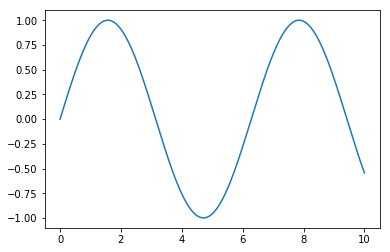

In [29]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [30]:
num_time_steps = 30

In [49]:
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)

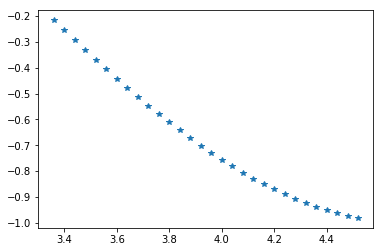

In [50]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

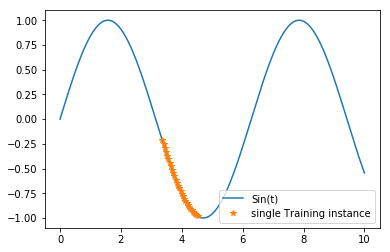

In [51]:

plt.plot(ts_data.x_data,ts_data.y_true,label='Sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(),'*',label="single Training instance")
plt.legend()

In [52]:
# TRAINING DATA

In [53]:
train_inst = np.linspace(5,5+ts_data.resolution*(num_time_steps+1),num_time_steps+1)

In [54]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

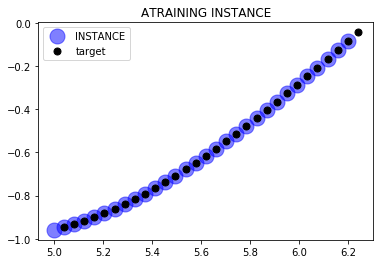

In [56]:
plt.title("ATRAINING INSTANCE")

plt.plot(train_inst[:-1],ts_data.ret_true(train_inst[:-1]),'bo',markersize=15,alpha=0.5,label='INSTANCE')

plt.plot(train_inst[1:],ts_data.ret_true(train_inst[1:]),'ko',markersize=7,label='target')

plt.legend()